product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage     object
rating                 float64
rating_count             int32
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object

Descriptive Statistics:
        discounted_price   actual_price       rating   rating_count
count       1465.000000    1465.000000  1464.000000    1465.000000
mean        3125.310874    5444.990635     4.096585   18270.564505
std         6944.304394   10874.826864     0.291674   42729.995315
min           39.000000      39.000000     2.000000       0.000000
25%          325.000000     800.000000     4.000000    1173.000000
50%          799.000000    1650.000000     4.100000    5178.00

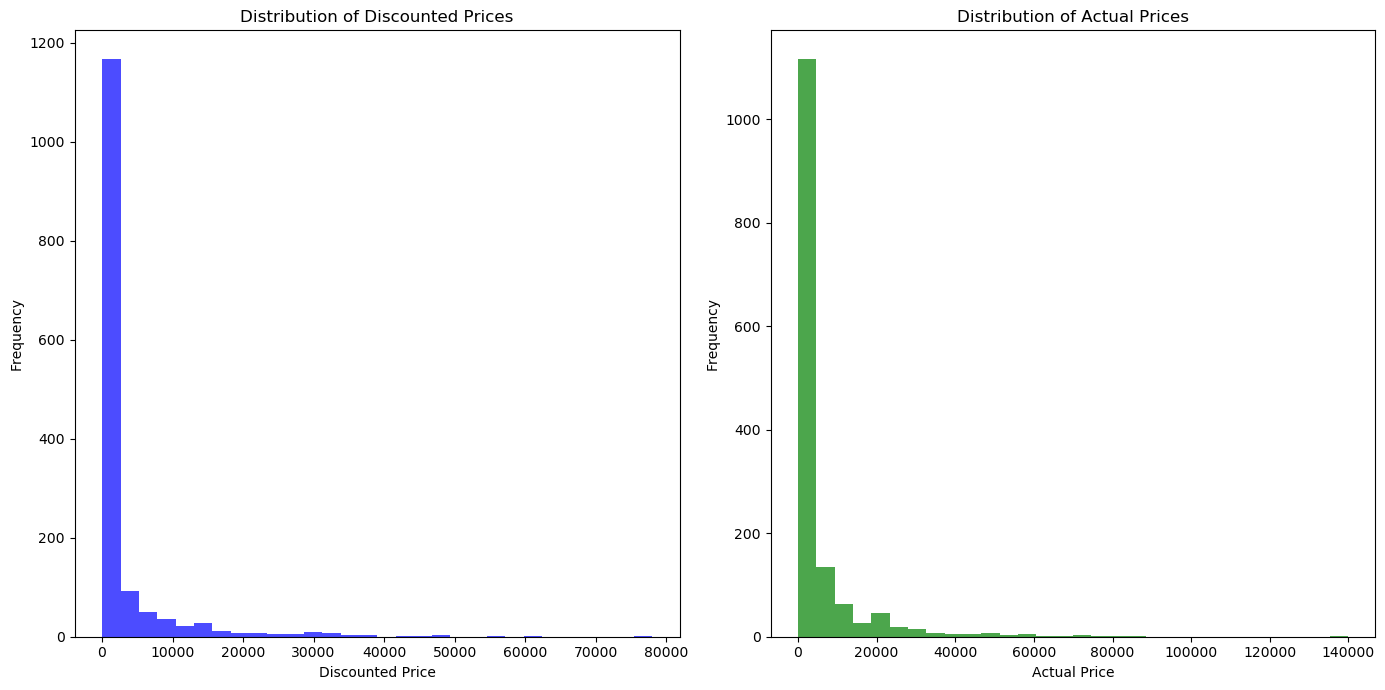


Correlation Matrix:
                   discounted_price  actual_price    rating  rating_count
discounted_price          1.000000      0.961915  0.120337     -0.027010
actual_price              0.961915      1.000000  0.121642     -0.035890
rating                    0.120337      0.121642  1.000000      0.101584
rating_count             -0.027010     -0.035890  0.101584      1.000000


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\Aashily Sumana Sri\OneDrive\Documents\data\amazon.csv'
data = pd.read_csv(file_path)

# Clean data
# Remove '₹', '|', and commas from price columns and convert them to numeric
data['discounted_price'] = data['discounted_price'].replace({'₹': '', ',': '', '\|': ''}, regex=True)
data['actual_price'] = data['actual_price'].replace({'₹': '', ',': '', '\|': ''}, regex=True)
data['discounted_price'] = pd.to_numeric(data['discounted_price'], errors='coerce')
data['actual_price'] = pd.to_numeric(data['actual_price'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Handle NaN values in 'rating_count' before converting to integer
data['rating_count'] = data['rating_count'].replace({',': '', '\|': ''}, regex=True)
data['rating_count'] = pd.to_numeric(data['rating_count'], errors='coerce')
data['rating_count'] = data['rating_count'].fillna(0).astype(int)

# Display cleaned data types
print(data.dtypes)

# Descriptive statistics
print("\nDescriptive Statistics:\n", data.describe())

# Top 5 products by rating
top_rated_products = data.nlargest(5, 'rating')[['product_name', 'rating', 'rating_count']]
print("\nTop 5 Products by Rating:\n", top_rated_products)

# Top 5 most reviewed products
most_reviewed_products = data.nlargest(5, 'rating_count')[['product_name', 'rating', 'rating_count']]
print("\nTop 5 Most Reviewed Products:\n", most_reviewed_products)

# Price analysis
plt.figure(figsize=(14, 7))

# Distribution of discounted prices
plt.subplot(1, 2, 1)
plt.hist(data['discounted_price'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')

# Distribution of actual prices
plt.subplot(1, 2, 2)
plt.hist(data['actual_price'], bins=30, color='green', alpha=0.7)
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation analysis
correlation = data[['discounted_price', 'actual_price', 'rating', 'rating_count']].corr()
print("\nCorrelation Matrix:\n", correlation)
